In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
df=pd.read_excel("C:/Users/Deepa kumari/datascience/Customer Churn.xlsx")
print(df)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [7]:
x=df.columns[3:17]
x

Index(['Charge  Amount', 'Seconds of Use', 'Frequency of use',
       'Frequency of SMS', 'Distinct Called Numbers', 'Age Group',
       'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'],
      dtype='object')

In [8]:
encoded_df=pd.get_dummies(df[x],drop_first=True)

list(encoded_df.columns)

['Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

In [9]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import statsmodels.api as sm
y=df.Churn
x=sm.add_constant(encoded_df)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [12]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20)

In [13]:
clf=clf.fit(x_train,y_train)

In [14]:
classnames=['Retain','not Retain']

In [15]:
fig=plt.figure(figsize=(50,40))

<Figure size 5000x4000 with 0 Axes>

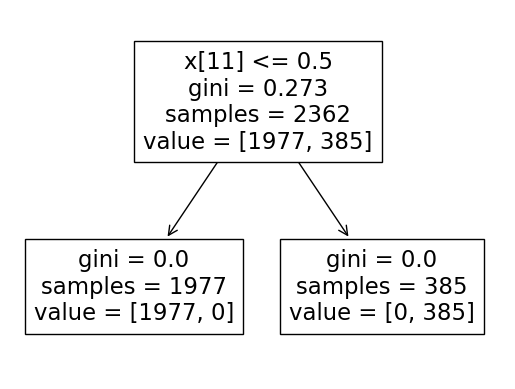

In [16]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
train_tree_predict=clf.predict(x_train)

<Axes: >

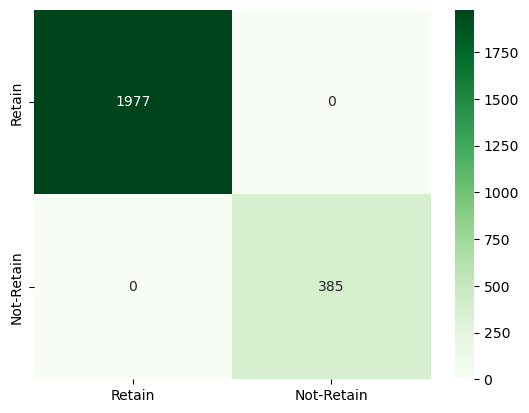

In [18]:
classnames=['Retain','Not-Retain']
confusionmatrix=confusion_matrix(y_train,train_tree_predict)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap='Greens')

In [19]:
metrics.roc_auc_score(y_train,train_tree_predict)

1.0

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
test_tree_predict=clf.predict(x_test)

In [21]:
classnames=['Pass','Fail']

In [22]:
classnames=['Retain','Not-Retain']
usionmatrix=confusion_matrix(y_train,train_tree_predict)
    6sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap='Greens')

IndentationError: unexpected indent (1713436108.py, line 3)